【設定】
* スキャナで取得して，該当するセルを自分でスクリーンショットで回収しました
* そこで手書き文字が書かれている場所を認識して，一枚１文字の画像に変換
* 今までのOCR分類器で処理

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

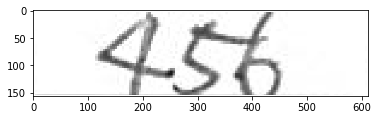

In [53]:
img_color = cv2.imread("../data/cell1.png", cv2.IMREAD_COLOR)
#【重要！】外枠に白い矩形を書き，オブジェクト(今回は手書き文字)と枠の連結を解除させる
img_color = cv2.rectangle(img_color, (1,1), (img_color.shape[1], img_color.shape[0]), (255,255,255), 3)

plt.imshow(img_color)
height, width, channels = img_color.shape

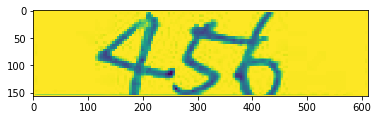

In [44]:
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)

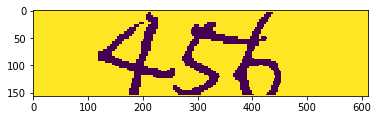

In [45]:
retval, dst = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV )
dst = cv2.bitwise_not(dst)
retval, dst = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(dst)

In [46]:
dst, contours, hierarchy = cv2.findContours(dst,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

True

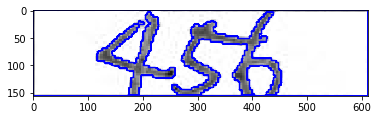

In [47]:
image = cv2.imread("../data/cell1.png", cv2.IMREAD_COLOR)
image = cv2.drawContours(image, contours, -1, (0,0,255,255), 2, cv2.LINE_AA)
plt.imshow(image)
cv2.imwrite('debug_1.png', image)

254 3 200 152
117 3 143 152


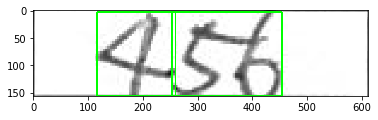

In [48]:
image = cv2.imread("../data/cell1.png", cv2.IMREAD_COLOR)
image_size = height * width
for i, contour in enumerate(contours):
        # 小さな領域の場合は間引く
        area = cv2.contourArea(contour)
        if area < 500:
            continue
        # 画像全体を占める領域は除外する
        if image_size * 0.99 < area:
            continue
        
        # 外接矩形を取得
        x,y,w,h = cv2.boundingRect(contour)
        print(x,y,w,h)
        image = cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        base_image = cv2.imread("../data/cell1.png", cv2.IMREAD_COLOR)
        cv2.imwrite("../data/test_{}.png".format(i),base_image[y:y+h, x:x+w])
        plt.imshow(image)

今後解決しないといけない点
* 連結文字の対応
* スマホカメラの画像からどう取得する？

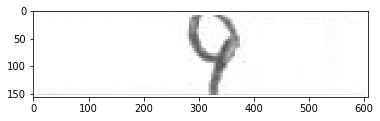

In [97]:
img_color = cv2.imread("../data/cell2.png", cv2.IMREAD_COLOR)
#【重要！】外枠に白い矩形を書き，オブジェクト(今回は手書き文字)と枠の連結を解除させる
img_color = cv2.rectangle(img_color, (2,2), (img_color.shape[1], img_color.shape[0]), (255,255,255), 8)

plt.imshow(img_color)
height, width, channels = img_color.shape

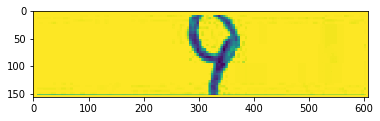

In [98]:
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)

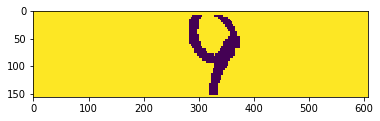

In [99]:
retval, dst = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV )
dst = cv2.bitwise_not(dst)
retval, dst = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(dst)

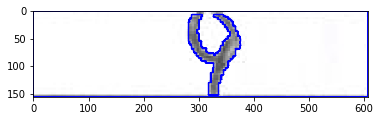

In [100]:
dst, contours, hierarchy = cv2.findContours(dst,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
image = cv2.imread("../data/cell2.png", cv2.IMREAD_COLOR)
image = cv2.drawContours(image, contours, -1, (0,0,255,255), 2, cv2.LINE_AA)
plt.imshow(image)
# cv2.imwrite('debug_1.png', image)

282 6 95 147


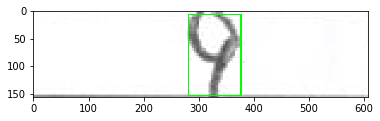

In [101]:
image = cv2.imread("../data/cell2.png", cv2.IMREAD_COLOR)
image_size = height * width
for i, contour in enumerate(contours):
        # 小さな領域の場合は間引く
        area = cv2.contourArea(contour)
        if area < 500:
            continue
        # 画像全体を占める領域は除外する
        if image_size * 0.99 < area:
            continue
        
        # 外接矩形を取得
        x,y,w,h = cv2.boundingRect(contour)
        print(x,y,w,h)
        image = cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        base_image = cv2.imread("../data/cell1.png", cv2.IMREAD_COLOR)
        cv2.imwrite("../data/test_{}.png".format(i),base_image[y:y+h, x:x+w])
        plt.imshow(image)